In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
pd.set_option('display.max_columns', None)

/Users/hardiksharma/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Step 1 : Load the Iris dataset

In [2]:
from sklearn.datasets import load_iris
X,y = load_iris(return_X_y=True)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [3]:
X,y

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

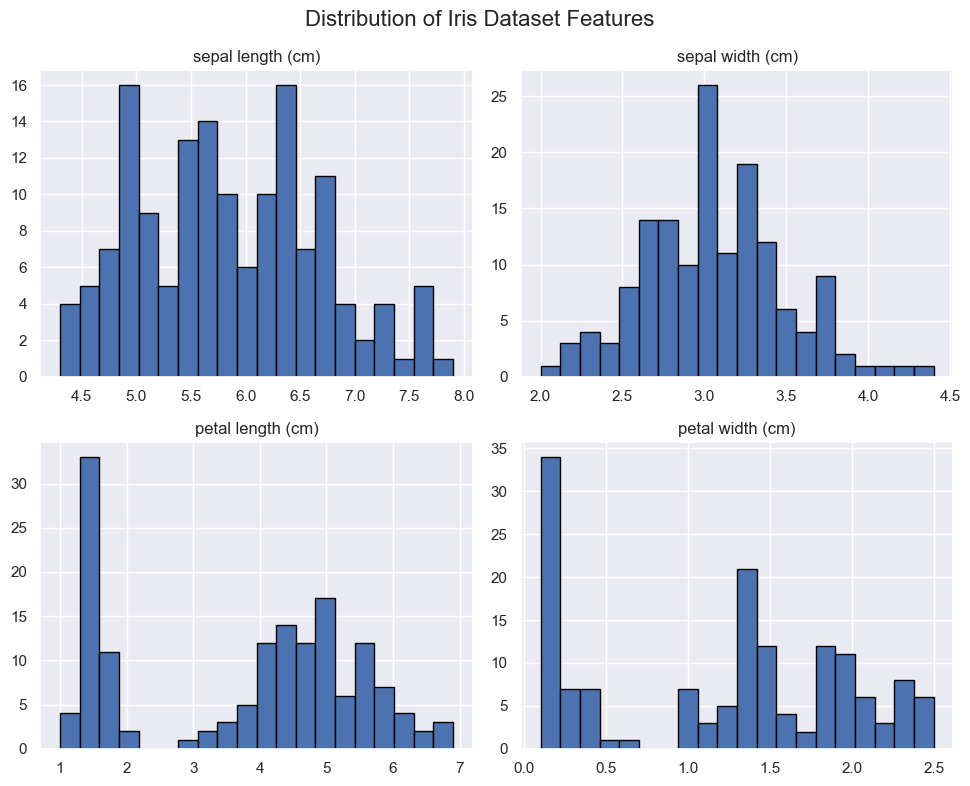

In [4]:
feature_names = ['sepal length (cm)', 'sepal width (cm)',
                 'petal length (cm)', 'petal width (cm)']

df = pd.DataFrame(X, columns=feature_names)
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Iris Dataset Features', fontsize=16)
plt.tight_layout()
plt.show()

## Step 2 : Train and Test split

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


## Step 3 : Load the Gaussian Naive Bayes Model

In [6]:
from sklearn.naive_bayes import GaussianNB

## I AM USING GAUSSIAN AS ALL OF MY FEATURES ARE CONTINUOUS AND KIND OFF FOLLOWS THE GAUSSIAN DISTRIBUTION
## DEPENDING UPON YOUR DATA, PLEASE USE BERNOULLI OR MULTINOMIAL NAIVE BAYES

gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)

## Step 4 : Performance Metrics

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

score = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(score)
print(cm)
print(classification_report(y_test, y_pred))

0.9666666666666667
[[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      1.00      0.94         8
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### IMPORTANT NOTE

Naive Bayes is not typically used for regression problems — it’s a classification algorithm by design.

Naive Bayes is a probabilistic classifier. It works by assigning a discrete label to an input based on probabilities. In regression, however, the goal is to predict a continuous value (e.g., house price, temperature, etc.) — which Naive Bayes isn’t inherently designed to do.

Key Challenges for Regression:
(1) Naive Bayes assumes the target is categorical, not continuous.
(2) You can’t apply the same discrete probability logic to infinitely many possible outcomes in regression.


Gaussian NB assumes features are continuous (modeled as Gaussian), but the target is still categorical.
It’s not meant to output a number — just to classify into categories.

So, in practice — Naive Bayes is used for classification, not regression. For continuous predictions, use dedicated regression algorithms.